In [1]:
# Plotting solar data from WACCM input files for solar parameters and solar spectra

# Creating new .nc files to use in Solar Min and Max WACCM runs


In [2]:
import xarray as xr
import numpy as np
import cftime
import matplotlib.pyplot as plt 
from cftime import datetime 
from datetime import datetime, date, timedelta
import time
import matplotlib.dates as mdates

# Set f10.7, f107a, kp, ap

In [3]:
#f107

# The solar radio flux at 10.7 cm (2800 MHz) is an excellent indicator of solar activity. Often called the F10.7 index, 
# it is one of the longest running records of solar activity. The F10.7 radio emissions originates high in the chromosphere 
# and low in the corona of the solar atmosphere. The F10.7 correlates well with the sunspot number as well as a number of 
# UltraViolet (UV) and visible solar irradiance records. The F10.7 has been measured consistently in Canada since 1947, 
# first at Ottawa, Ontario; and then at the Penticton Radio Observatory in British Columbia, Canada. Unlike many solar 
# indices, the F10.7 radio flux can easily be measured reliably on a day-to-day basis from the Earth’s surface, in all 
# types of weather. Reported in “solar flux units”, (s.f.u.), the F10.7 can vary from below 50 s.f.u., to above 
# 300 s.f.u., over the course of a solar cycle.

In [4]:
#sample file - want to create files with similar structure for my SMin and SMax data

dss = xr.open_dataset('Nc_Files/spectral_files/wa_avg_c20170519.nc')
dss

<xarray.Dataset>
Dimensions:  (time: 2)
Dimensions without coordinates: time
Data variables:
    date     (time) int32 ...
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
Attributes:
    Title:                     Average solar activity conditions
    source:                    www.sec.noa.gov
    creation_date:             May 19, 2017
    creator:                   Dan Marsh, NCAR
    history:                   Tue May 23 11:37:20 2017: ncap2 -O -s where (d...
    NCO:                       "4.6.2"
    nco_openmp_thread_number:  1

In [5]:
#Solar Min Paramerters - create NC file

ds_smin = xr.Dataset()

# Copy dimensions
for dim, size in dss.dims.items():
    ds_smin[dim] = xr.DataArray(np.arange(size), dims=dim)


# Iterate through variables and set new values
for var in dss.data_vars:
    # Set new values for each variable (replace with your own values)
    if var == 'date':
        ds_smin[var] = xr.DataArray([18000101, 22000101], dims='time', attrs=dss[var].attrs)
    elif var == 'f107':
        ds_smin[var] = xr.DataArray([70, 70], dims='time', attrs=dss[var].attrs)
    elif var == 'f107a':
        ds_smin[var] = xr.DataArray([70, 70], dims='time', attrs=dss[var].attrs)
    elif var == 'kp':
        ds_smin[var] = xr.DataArray([0.3, 0.3], dims='time', attrs=dss[var].attrs)
    elif var == 'ap':
        ds_smin[var] = xr.DataArray([1.8, 1.8], dims='time', attrs=dss[var].attrs)
    elif var == 'isn':
        ds_smin[var] = xr.DataArray([0, 0], dims='time', attrs=dss[var].attrs)

ds_smin.attrs['title'] = 'Solar Minimum Parameters'
ds_smin.attrs['creator'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'
ds_smin.attrs['creation_date'] = '20240125'

# Save the new dataset to a NetCDF file
ds_smin.to_netcdf('Nc_Files/spectral_files/Smin_params.nc')

# Print the new dataset
ds_smin

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) int64 0 1
Data variables:
    date     (time) int64 18000101 22000101
    f107     (time) int64 70 70
    f107a    (time) int64 70 70
    kp       (time) float64 0.3 0.3
    ap       (time) float64 1.8 1.8
    isn      (time) int64 0 0
Attributes:
    title:          Solar Minimum Parameters
    creator:        Tasha Aylett n.m.aylett@leeds.ac.uk
    creation_date:  20240125

In [6]:
#Solar Max Paramerters - create NC file

ds_new = xr.Dataset()

# Copy dimensions
for dim, size in dss.dims.items():
    ds_new[dim] = xr.DataArray(np.arange(size), dims=dim)


# Iterate through variables and set new values
for var in dss.data_vars:
    # Set new values for each variable (replace with your own values)
    if var == 'date':
        ds_new[var] = xr.DataArray([18000101, 22000101], dims='time', attrs=dss[var].attrs)
    elif var == 'f107':
        ds_new[var] = xr.DataArray([200, 200], dims='time', attrs=dss[var].attrs)
    elif var == 'f107a':
        ds_new[var] = xr.DataArray([200, 200], dims='time', attrs=dss[var].attrs)
    elif var == 'kp':
        ds_new[var] = xr.DataArray([3.0, 3.0], dims='time', attrs=dss[var].attrs)
    elif var == 'ap':
        ds_new[var] = xr.DataArray([15, 15], dims='time', attrs=dss[var].attrs)
    elif var == 'isn':
        ds_new[var] = xr.DataArray([0, 0], dims='time', attrs=dss[var].attrs)


ds_new.attrs['title'] = 'Solar Maximum Parameters'
ds_new.attrs['creator'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'
ds_new.attrs['creation_date'] = '20240125'

# Save the new dataset to a NetCDF file
ds_smin.to_netcdf('Nc_Files/spectral_files/Smax_params.nc')

# Print the new dataset
ds_new

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) int64 0 1
Data variables:
    date     (time) int64 18000101 22000101
    f107     (time) int64 200 200
    f107a    (time) int64 200 200
    kp       (time) float64 3.0 3.0
    ap       (time) int64 15 15
    isn      (time) int64 0 0
Attributes:
    title:          Solar Maximum Parameters
    creator:        Tasha Aylett n.m.aylett@leeds.ac.uk
    creation_date:  20240125

# tsi (Total Solar Irradiance)

In [7]:
nc_sol_irrad = 'Nc_Files/arc4/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc'
ds_sol_irrad = xr.open_dataset(nc_sol_irrad, decode_times=False)
ds_sol_irrad

<xarray.Dataset>
Dimensions:         (wavelength: 3780, time: 23741, ref_time_bound: 2)
Coordinates:
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
Dimensions without coordinates: time
Data variables:
    band_width      (wavelength) float64 ...
    date            (time) float64 ...
    ssi             (time, wavelength) float64 ...
    ssi_ref         (wavelength) float64 ...
    tsi             (time) float64 ...
    tsi_ref         float64 ...
Attributes:
    notes:                     \nData derived by Judith Lean, jlean@ssd5.nrl....
    scaling:                   \nAbsolute spectral and total irradiance inclu...
    history:                   Tue Jun 23 12:37:10 2015: ncrcat spectral_irra...
    Source_data:               \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    Source_website:            \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    title:                     \nLean daily solar irradiance for 19500101-201...
    creator:                   \nMike Mills, mmills@ucar.edu
    creation_date:             \nWed Feb 27 14:56:27 MST 2013
    nco_openmp_thread_number:  1
    NCO:                       4.4.2

In [8]:
#reference (start and end) dates for above dataset
ref_time_bound = ds_sol_irrad['ref_time_bound']
value_0 = ref_time_bound[0].values #669591
value_1 = ref_time_bound[1].values #681636

# Convert values to datetime using cftime
datetime_0 = cftime.num2date(value_0, 'days since 0000-01-01 00:00:00', 'proleptic_gregorian')
datetime_1 = cftime.num2date(value_1, 'days since 0000-01-01 00:00:00', 'proleptic_gregorian')

print("Value 0:", datetime_0.strftime('%Y-%m-%d %H:%M:%S'))
print("Value 1:", datetime_1.strftime('%Y-%m-%d %H:%M:%S'))

Value 0: 1833-04-12 00:00:00
Value 1: 1866-04-04 00:00:00


In [9]:
#81 days spanning before/after Solar Min or Max dates listed on Wikipedia for solar cycles 1950 - 2014 https://en.wikipedia.org/wiki/List_of_solar_cycles
#Indices to index tsi with 

#Solar cycle 19
#Min 1954-04
date_ind_min19 = 1551
date_ind_st_min19 = date_ind_min19 -40
date_ind_fin_min19 = date_ind_min19 +41
#Max 1958-03
date_ind_max19 = 2981
date_ind_st_max19 = date_ind_max19 -40
date_ind_fin_max19 = date_ind_max19 +41


#Solar cycle 20
#Min 1964-10
date_ind_min20 = 5387
date_ind_st_min20 = date_ind_min20 -40
date_ind_fin_min20 = date_ind_min20 +41
#Max 1968-11
date_ind_max20 = 6879
date_ind_st_max20 = date_ind_max20 -40
date_ind_fin_max20 = date_ind_max20 +41


#Solar cycle 21
#Min 1976-03
date_ind_min21 = 9556
date_ind_st_min21 = date_ind_min21 -40
date_ind_fin_min21 = date_ind_min21 +41
#Max 1979-12
date_ind_max21 = 10926
date_ind_st_max21 = date_ind_max21 -40
date_ind_fin_max21 = date_ind_max21 +41


#Solar cycle 22
#Min 1986-09
date_ind_min22 = 13392
date_ind_st_min22 = date_ind_min22 -40
date_ind_fin_min22 = date_ind_min22 +41
#Max 1989-11
date_ind_max22 = 14549
date_ind_st_max22 = date_ind_max22 -40
date_ind_fin_max22 = date_ind_max22 +41


#Solar cycle 23
#Min 1996-08
date_ind_min23 = 17014
date_ind_st_min23 = date_ind_min23 -40
date_ind_fin_min23 = date_ind_min23 +41
#Max 2001-11
date_ind_max23 = 18932
date_ind_st_max23 = date_ind_max23 -40
date_ind_fin_max23 = date_ind_max23 +41


#Solar cycle 24
#Min 2008-12
date_ind_min24 = 21519 #2008-12-01
date_ind_st_min24 = date_ind_min24 -40
date_ind_fin_min24 = date_ind_min24 +41
#Max 2014-04
date_ind_max24 = 23466
date_ind_st_max24 = date_ind_max24 -40
date_ind_fin_max24 = date_ind_max24 +41

In [10]:
tsi = ds_sol_irrad['tsi']

date = ds_sol_irrad['date'] #1950-01-01 -> 2014-12-31   x23741
times = np.arange(datetime(1950,1,1), datetime(2014,12,31) + timedelta(days=1), timedelta(days=1)).astype(datetime)

#indexing tsi array using indices from above cell, corresponding to a slice covering before/after solar min or max
tsi_min19 = tsi[date_ind_st_min19:date_ind_fin_min19]
tsi_min20 = tsi[date_ind_st_min20:date_ind_fin_min20]
tsi_min21 = tsi[date_ind_st_min21:date_ind_fin_min21]
tsi_min22 = tsi[date_ind_st_min22:date_ind_fin_min22]
tsi_min23 = tsi[date_ind_st_min23:date_ind_fin_min23]
tsi_min24 = tsi[date_ind_st_min24:date_ind_fin_min24]

tsi_max19 = tsi[date_ind_st_max19:date_ind_fin_max19]
tsi_max20 = tsi[date_ind_st_max20:date_ind_fin_max20]
tsi_max21 = tsi[date_ind_st_max21:date_ind_fin_max21]
tsi_max22 = tsi[date_ind_st_max22:date_ind_fin_max22]
tsi_max23 = tsi[date_ind_st_max23:date_ind_fin_max23]
tsi_max24 = tsi[date_ind_st_max24:date_ind_fin_max24]

timee = np.arange(0,len(tsi_min19))

#Take the average over the sliced tsi arrays over time dimension (81 day period):
mean_tsi_min19 = np.mean(tsi_min19, axis=0)
mean_tsi_min20 = np.mean(tsi_min20, axis=0)
mean_tsi_min21 = np.mean(tsi_min21, axis=0)
mean_tsi_min22 = np.mean(tsi_min22, axis=0)
mean_tsi_min23 = np.mean(tsi_min23, axis=0)
mean_tsi_min24 = np.mean(tsi_min24, axis=0)

mean_tsi_max19 = np.mean(tsi_max19, axis=0)
mean_tsi_max20 = np.mean(tsi_max20, axis=0)
mean_tsi_max21 = np.mean(tsi_max21, axis=0)
mean_tsi_max22 = np.mean(tsi_max22, axis=0)
mean_tsi_max23 = np.mean(tsi_max23, axis=0)
mean_tsi_max24 = np.mean(tsi_max24, axis=0)

#Take the average of all of the solar min/max tsi arrays from prev step
min_tsi = np.mean([tsi_min19, tsi_min20, tsi_min21, tsi_min22, tsi_min23, tsi_min24], axis=0)
max_tsi = np.mean([tsi_max19, tsi_max20, tsi_max21, tsi_max22, tsi_max23, tsi_max24], axis=0)


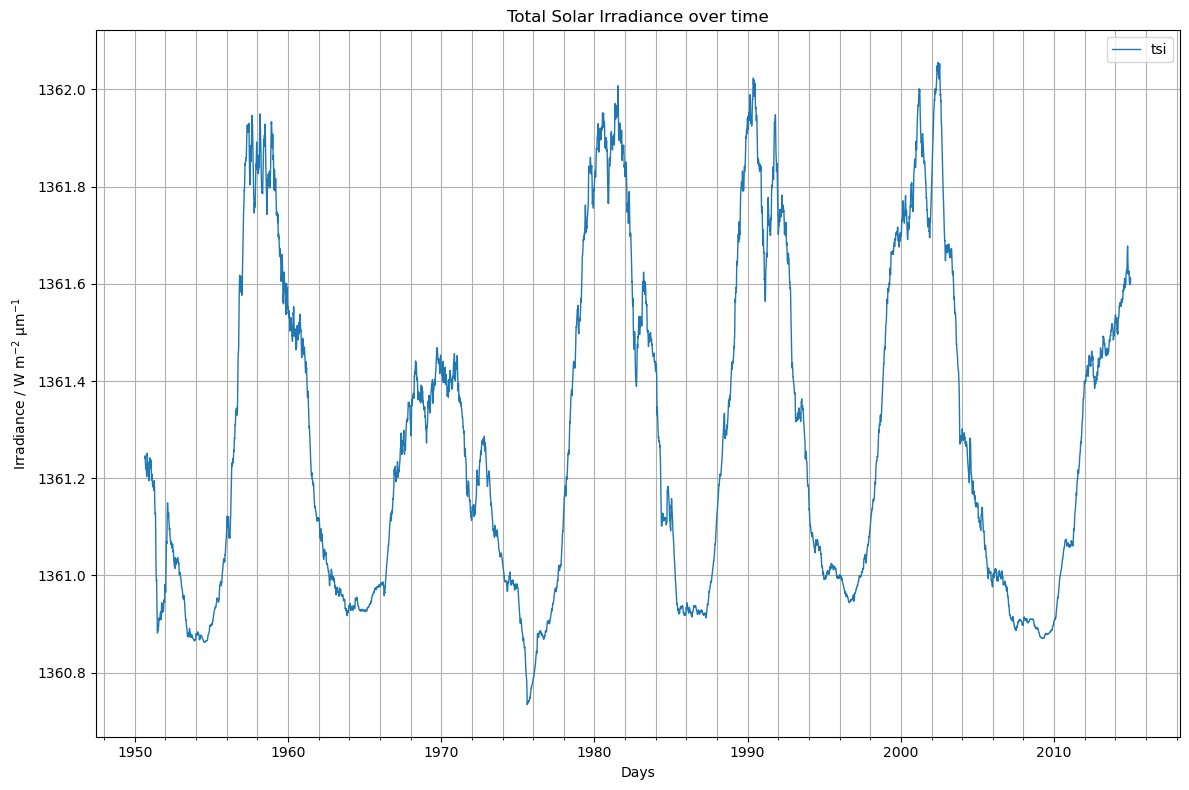

In [11]:
#Plot smoothed tsi data as a time series

window_size = 81*3
tsi_rollmean = np.convolve(tsi, np.ones(window_size)/window_size, mode='valid')
adjusted_times = times[window_size-1:len(tsi_rollmean) + window_size-1]


fig, ax = plt.subplots(figsize=(12, 8))
A = ax.plot(adjusted_times, tsi_rollmean, label='tsi', linewidth=1.0 )

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance over time')
ax.legend()
ax.grid(True, which='both')
# Set explicit major ticks with an interval of 5 years for datetime format
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(2))
plt.tight_layout()


#Solar cycle 19 #Min 1954-04 #Max 1958-03
#Solar cycle 20 #Min 1964-10 #Max 1968-11
#Solar cycle 21 #**Min 1976-03** #Max 1979-12
#Solar cycle 22 #Min 1986-09 **#Max 1989-11**
#Solar cycle 23 #Min 1996-08 #Max 2001-11
#Solar cycle 24 #Min 2008-12 #Max 2014-04


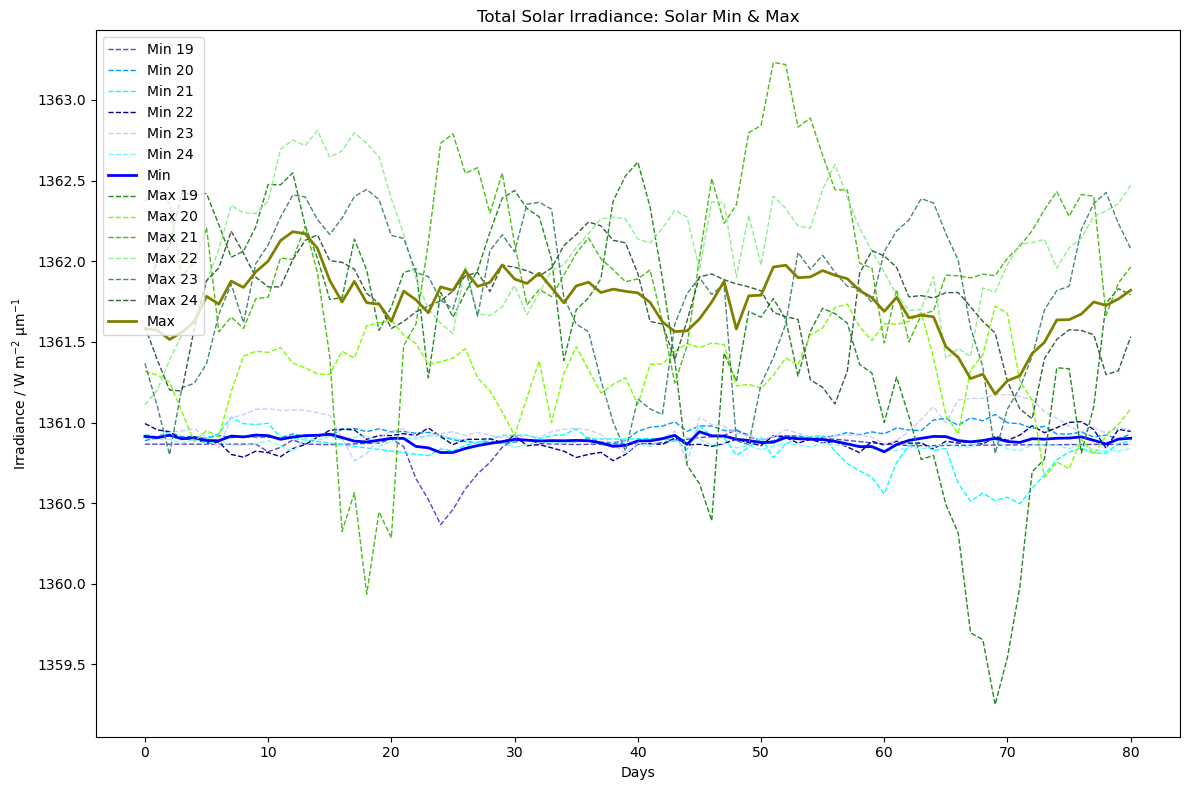

In [12]:
# Plot each individual 81 day solar min period (dashed lines) and the average of all 6 cycles (bold)
fig, ax = plt.subplots(figsize=(12, 8))


A = ax.plot(timee, tsi_min19, linestyle='dashed', color='#5D3FD3', label='Min 19', linewidth=1.0 )
B = ax.plot(timee, tsi_min20, linestyle='dashed', color='#0096FF', label='Min 20', linewidth=1.0 )
C = ax.plot(timee, tsi_min21, linestyle='dashed', color='#00FFFF', label='Min 21', linewidth=1.0 )
D = ax.plot(timee, tsi_min22, linestyle='dashed', color='#00008B', label='Min 22', linewidth=1.0 )
E = ax.plot(timee, tsi_min23, linestyle='dashed', color='#CCCCFF', label='Min 23', linewidth=1.0 )
F = ax.plot(timee, tsi_min24, linestyle='dashed', color='#7DF9FF', label='Min 24', linewidth=1.0 )

G = ax.plot(timee, min_tsi, label='Min', color='#0000FF', linewidth=2.0 )


Aa = ax.plot(timee, tsi_max19, linestyle='dashed', color='#228B22', label='Max 19', linewidth=1.0 )
Bb = ax.plot(timee, tsi_max20, linestyle='dashed', color='#7CFC00', label='Max 20', linewidth=1.0 )
Cc = ax.plot(timee, tsi_max21, linestyle='dashed', color='#4CBB17', label='Max 21', linewidth=1.0 )
Dd = ax.plot(timee, tsi_max22, linestyle='dashed', color='#90EE90', label='Max 22', linewidth=1.0 )
Ee = ax.plot(timee, tsi_max23, linestyle='dashed', color='#478778', label='Max 23', linewidth=1.0 )
Ff = ax.plot(timee, tsi_max24, linestyle='dashed', color='#355E3B', label='Max 24', linewidth=1.0 )

Gg = ax.plot(timee, max_tsi, label='Max', color='#808000', linewidth=2.0 )


ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Solar Min & Max')
ax.legend()
plt.tight_layout()


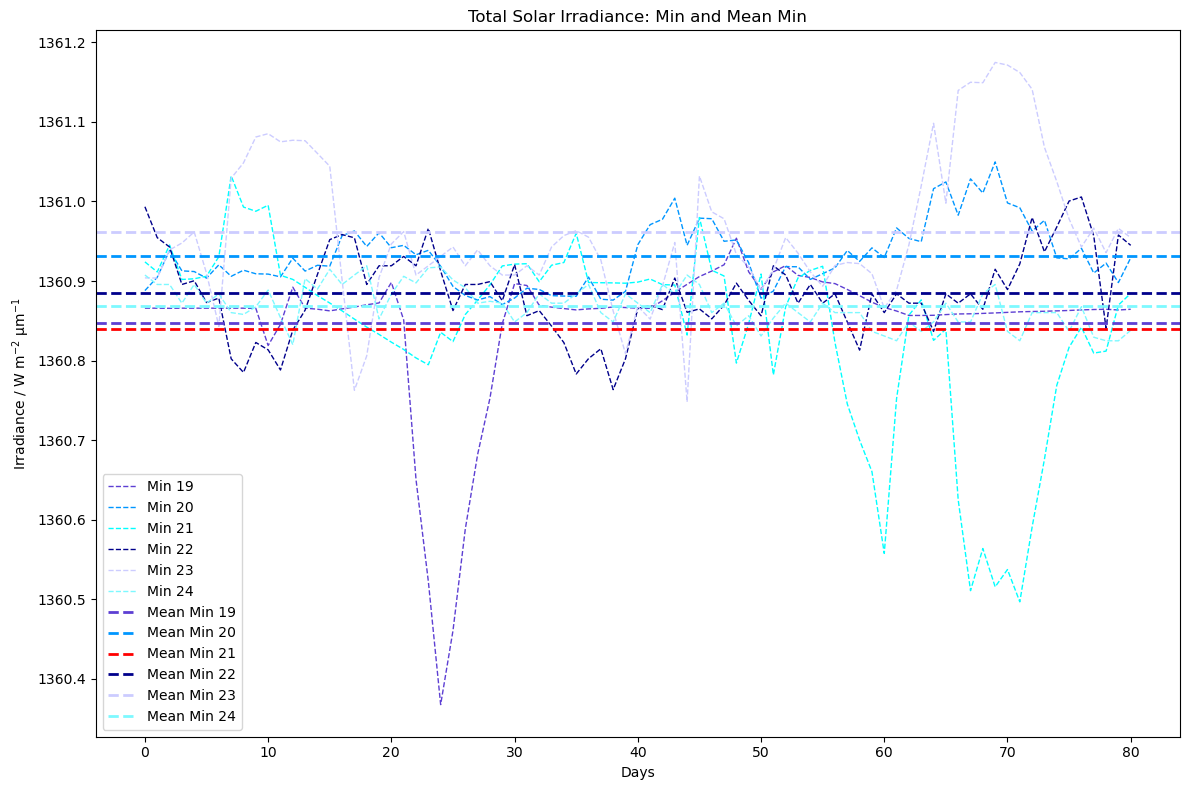

In [13]:
# Solar Min
# Plot mean value of each solar min sample. These are single values but I'm plotting them as a line
# Value for solar min cycle 21 is smallest, and so I will use this for the model run

fig, ax = plt.subplots(figsize=(12, 8))

# Plot individual lines
A = ax.plot(timee, tsi_min19, linestyle='dashed', color='#5D3FD3', label='Min 19', linewidth=1.0)
B = ax.plot(timee, tsi_min20, linestyle='dashed', color='#0096FF', label='Min 20', linewidth=1.0)
C = ax.plot(timee, tsi_min21, linestyle='dashed', color='#00FFFF', label='Min 21', linewidth=1.0)
D = ax.plot(timee, tsi_min22, linestyle='dashed', color='#00008B', label='Min 22', linewidth=1.0)
E = ax.plot(timee, tsi_min23, linestyle='dashed', color='#CCCCFF', label='Min 23', linewidth=1.0)
F = ax.plot(timee, tsi_min24, linestyle='dashed', color='#7DF9FF', label='Min 24', linewidth=1.0)

# Plot mean lines
G = ax.axhline(y=np.mean(mean_tsi_min19), color='#5D3FD3', linestyle='dashed', label='Mean Min 19', linewidth=2.0)
H = ax.axhline(y=np.mean(mean_tsi_min20), color='#0096FF', linestyle='dashed', label='Mean Min 20', linewidth=2.0)
I = ax.axhline(y=np.mean(mean_tsi_min21), color='RED', linestyle='dashed', label='Mean Min 21', linewidth=2.0)
J = ax.axhline(y=np.mean(mean_tsi_min22), color='#00008B', linestyle='dashed', label='Mean Min 22', linewidth=2.0)
K = ax.axhline(y=np.mean(mean_tsi_min23), color='#CCCCFF', linestyle='dashed', label='Mean Min 23', linewidth=2.0)
L = ax.axhline(y=np.mean(mean_tsi_min24), color='#7DF9FF', linestyle='dashed', label='Mean Min 24', linewidth=2.0)

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Min and Mean Min')
ax.legend()
plt.tight_layout()


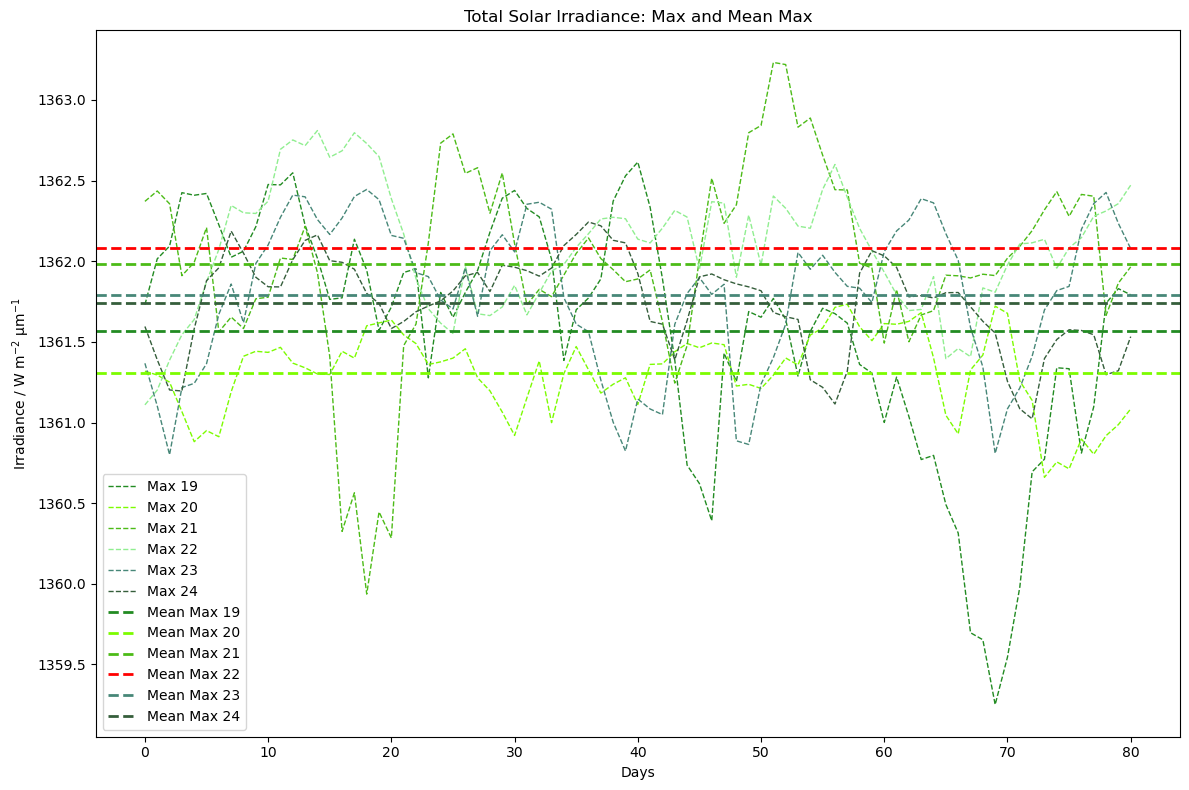

In [14]:
# Solar Max
# Plot mean value of each solar max sample. These are single values but I'm plotting them as a line.
# Value for solar max cycle 22 is largest, and so I will use this for the model run

fig, ax = plt.subplots(figsize=(12, 8))

# Plot individual lines
A = ax.plot(timee, tsi_max19, linestyle='dashed', color='#228B22', label='Max 19', linewidth=1.0)
B = ax.plot(timee, tsi_max20, linestyle='dashed', color='#7CFC00', label='Max 20', linewidth=1.0)
C = ax.plot(timee, tsi_max21, linestyle='dashed', color='#4CBB17', label='Max 21', linewidth=1.0)
D = ax.plot(timee, tsi_max22, linestyle='dashed', color='#90EE90', label='Max 22', linewidth=1.0)
E = ax.plot(timee, tsi_max23, linestyle='dashed', color='#478778', label='Max 23', linewidth=1.0)
F = ax.plot(timee, tsi_max24, linestyle='dashed', color='#355E3B', label='Max 24', linewidth=1.0)

# Plot mean lines
G = ax.axhline(y=np.mean(mean_tsi_max19), color='#228B22', linestyle='dashed', label='Mean Max 19', linewidth=2.0)
H = ax.axhline(y=np.mean(mean_tsi_max20), color='#7CFC00', linestyle='dashed', label='Mean Max 20', linewidth=2.0)
I = ax.axhline(y=np.mean(mean_tsi_max21), color='#4CBB17', linestyle='dashed', label='Mean Max 21', linewidth=2.0)
J = ax.axhline(y=np.mean(mean_tsi_max22), color='RED', linestyle='dashed', label='Mean Max 22', linewidth=2.0)
K = ax.axhline(y=np.mean(mean_tsi_max23), color='#478778', linestyle='dashed', label='Mean Max 23', linewidth=2.0)
L = ax.axhline(y=np.mean(mean_tsi_max24), color='#355E3B', linestyle='dashed', label='Mean Max 24', linewidth=2.0)

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Max and Mean Max')
ax.legend()
plt.tight_layout()


In [15]:
# Solar Min
# Solar Cycle 21 is lowest irradiance

mean_tsi_min21.item() # = 1360.83910467   W m-2 Cm-1


1360.839104674074

In [16]:
# Solar Max
# Solar Cycle 22 is highest irradiance

mean_tsi_max22.item()  # = 1362.08482686   W m-2 Cm-1

1362.0848268635802

# ssi (Solar Spectral Irradiance)

In [17]:
ssi = ds_sol_irrad['ssi']
wavelength = ds_sol_irrad['wavelength']

#ssi at solar min and max dates for the last 6 cycles. Other dim is wavelength
ssi_min19 = ssi[date_ind_min19,:]
ssi_min20 = ssi[date_ind_min20,:]
ssi_min21 = ssi[date_ind_min21,:]
ssi_min22 = ssi[date_ind_min22,:]
ssi_min23 = ssi[date_ind_min23,:]
ssi_min24 = ssi[date_ind_min24,:]

ssi_max19 = ssi[date_ind_max19,:]
ssi_max20 = ssi[date_ind_max20,:]
ssi_max21 = ssi[date_ind_max21,:]
ssi_max22 = ssi[date_ind_max22,:]
ssi_max23 = ssi[date_ind_max23,:]
ssi_max24 = ssi[date_ind_max24,:]

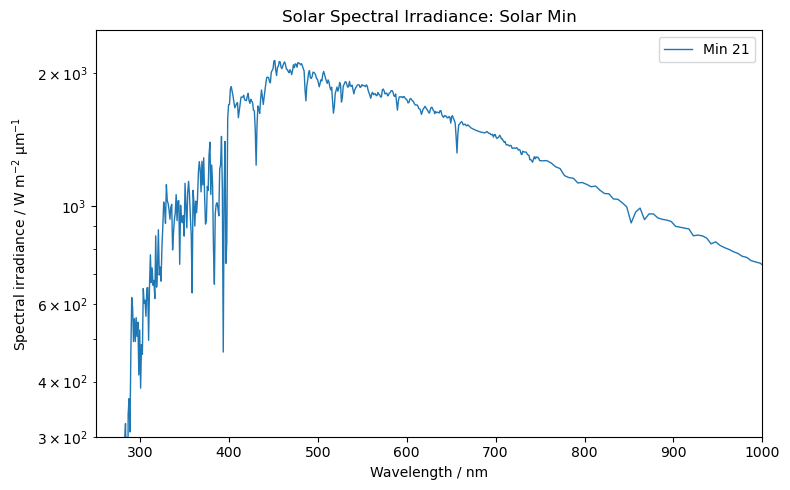

In [18]:
# Solar Min
#Plotting solar sectrum for chosen solar min/cycle above for tsi: minimum from cycle 21

fig, ax = plt.subplots(figsize=(8, 5))

# A = ax.plot(wavelength, ssi_min19, label='Min 19', linewidth=1.0 )
# B = ax.plot(wavelength, ssi_min20, label='Min 20', linewidth=1.0 )
C = ax.plot(wavelength, ssi_min21, label='Min 21', linewidth=1.0 ) #chosen spectrum for lowest irradiance
# D = ax.plot(wavelength, ssi_min22, label='Min 22', linewidth=1.0 )
# E = ax.plot(wavelength, ssi_min23, label='Min 23', linewidth=1.0 )
# F = ax.plot(wavelength, ssi_min24, label='Min 24', linewidth=1.0 )

ax.set_yscale('log')
ax.set_ylabel('Spectral irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_ylim(300,2500)
ax.set_xlim(250,1000)
ax.set_xlabel('Wavelength / nm')
ax.set_title('Solar Spectral Irradiance: Solar Min')
ax.legend()
plt.tight_layout()

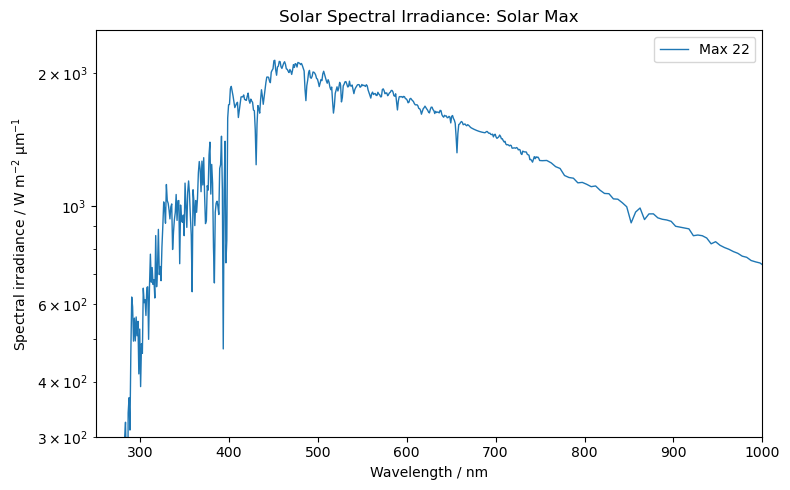

In [19]:
# Solar Max
#Plotting solar sectrum for chosen solar max/cycle above for tsi: maximum from cycle 22

fig, ax = plt.subplots(figsize=(8, 5))

# Aa = ax.plot(wavelength, ssi_max19, label='Max 19', linewidth=1.0 )
# Bb = ax.plot(wavelength, ssi_max20, label='Max 20', linewidth=1.0 )
# Cc = ax.plot(wavelength, ssi_max21, label='Max 21', linewidth=1.0 )
Dd = ax.plot(wavelength, ssi_max22, label='Max 22', linewidth=1.0 ) #chosen spectrum for highest irradiance
# Ee = ax.plot(wavelength, ssi_max23, label='Max 23', linewidth=1.0 )
# Ff = ax.plot(wavelength, ssi_max24, label='Max 24', linewidth=1.0 )

# Gg = ax.plot(wavelength, max_ssi, label='Max', color='g',  linewidth=1.0 )

ax.set_yscale('log')
ax.set_ylabel('Spectral irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_ylim(300,2500)
ax.set_xlim(250,1000)
ax.set_xlabel('Wavelength / nm')
ax.set_title('Solar Spectral Irradiance: Solar Max')
ax.legend()
plt.tight_layout()

# Create new ssi & tsi NC file

In [20]:
# Creating new nc files to use in the solar min and max model runs
#Following/using info from original file, but changing relevant parts as above

In [21]:
# Solar Min

#create xr variable with two time steps
ssi_min21_exp = xr.concat([ssi_min21] * 2, dim='time')

#create empty dataset
new_ds_smin = xr.Dataset()

#append data to the empty dataset
new_ds_smin['wavelength'] = xr.DataArray(ds_sol_irrad['wavelength'], dims='wavelength', attrs=ds_sol_irrad['wavelength'].attrs)
new_ds_smin['ref_time_bound'] = xr.DataArray(ds_sol_irrad['ref_time_bound'], dims='ref_time_bound', attrs=ds_sol_irrad['ref_time_bound'].attrs)

#set time values for two timesteps to random times much before/after model run dates
#this way, when the file is accessed, the model will interpolate the values (which are ultimately both the same) to use this value 
new_ds_smin['date'] = xr.DataArray([18000101, 22000101], dims='time', attrs=ds_sol_irrad['date'].attrs)  


new_ds_smin['band_width'] = xr.DataArray(ds_sol_irrad['band_width'], dims='wavelength', attrs=ds_sol_irrad['band_width'].attrs)

new_ds_smin['ssi'] = xr.DataArray(ssi_min21_exp, dims=('time', 'wavelength'), attrs=ds_sol_irrad['ssi'].attrs)
new_ds_smin['ssi_ref'] = xr.DataArray(ds_sol_irrad['ssi_ref'], dims='wavelength', attrs=ds_sol_irrad['ssi_ref'].attrs)

new_ds_smin['tsi'] = xr.DataArray([mean_tsi_min21.item(),mean_tsi_min21.item()], dims='time', attrs=ds_sol_irrad['tsi'].attrs)
new_ds_smin['tsi_ref'] = xr.DataArray(ds_sol_irrad['tsi_ref'], attrs=ds_sol_irrad['tsi_ref'].attrs)


new_ds_smin.attrs['notes from prev file'] = '''Data derived by Judith Lean, jlean@ssd5.nrl.navy.mil
Total and spectral irradiance variations are determined independently of each other,
with more uncertainty in the spectral irradiance changes which are determined in 1 
nm bins.  Integrated SSI is therefore varies slightly from TSI.
Reference spectral and total irradiances derived from average over years 1834-1867 (solar
cycles 8-10) using annual average data (spectral_irradiance_Lean_1610-2140_ann_c100405.nc)'''

new_ds_smin.attrs['author'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'

new_ds_smin.attrs['Further Notes'] = '''
Data derived from file: spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc, Mike Mills, mmills@ucar.edu

tsi is an 81 day average (3 solar rotations) around the solar min for cycle 21 (1976-03-01)
ssi is the ssi spectrum from 1976-03-01

Data repeated over two dates, 18000101 and 22000101

ssi_ref and tsi_ref are same as in prev file
'''

new_ds_smin.to_netcdf('Nc_Files/spectral_files/Smin_spectral_irradiance_cycle21.nc')

new_ds_smin

<xarray.Dataset>
Dimensions:         (wavelength: 3780, ref_time_bound: 2, time: 2)
Coordinates:
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
Dimensions without coordinates: time
Data variables:
    date            (time) int64 18000101 22000101
    band_width      (wavelength) float64 1.0 1.0 1.0 1.0 ... 50.0 50.0 50.0 50.0
    ssi             (time, wavelength) float64 0.1317 5.586 ... 2.654e-05
    ssi_ref         (wavelength) float64 0.1392 5.836 ... 2.66e-05 2.655e-05
    tsi             (time) float64 1.361e+03 1.361e+03
    tsi_ref         float64 1.361e+03
Attributes:
    notes from prev file:  Data derived by Judith Lean, jlean@ssd5.nrl.navy.m...
    author:                Tasha Aylett n.m.aylett@leeds.ac.uk
    Further Notes:         \nData derived from file: spectral_irradiance_Lean...

In [22]:
# Solar Max

#create xr variable with two time steps
ssi_max22_exp = xr.concat([ssi_max22] * 2, dim='time')

#create empty dataset
new_ds_smax = xr.Dataset()

#append data to the empty dataset
new_ds_smax['wavelength'] = xr.DataArray(ds_sol_irrad['wavelength'], dims='wavelength', attrs=ds_sol_irrad['wavelength'].attrs)
new_ds_smax['ref_time_bound'] = xr.DataArray(ds_sol_irrad['ref_time_bound'], dims='ref_time_bound', attrs=ds_sol_irrad['ref_time_bound'].attrs)

#set time values for two timesteps to random times much before/after model run dates
#this way, when the file is accessed, the model will interpolate the values (which are ultimately both the same) to use this value 
new_ds_smax['date'] = xr.DataArray([18000101, 22000101], dims='time', attrs=ds_sol_irrad['date'].attrs)
new_ds_smax['band_width'] = xr.DataArray(ds_sol_irrad['band_width'], dims='wavelength', attrs=ds_sol_irrad['band_width'].attrs)

new_ds_smax['ssi'] = xr.DataArray(ssi_max22_exp, dims=('time', 'wavelength'), attrs=ds_sol_irrad['ssi'].attrs)
new_ds_smax['ssi_ref'] = xr.DataArray(ds_sol_irrad['ssi_ref'], dims='wavelength', attrs=ds_sol_irrad['ssi_ref'].attrs)

new_ds_smax['tsi'] = xr.DataArray([mean_tsi_max22.item(),mean_tsi_max22.item()], dims='time', attrs=ds_sol_irrad['tsi'].attrs)
new_ds_smax['tsi_ref'] = xr.DataArray(ds_sol_irrad['tsi_ref'], attrs=ds_sol_irrad['tsi_ref'].attrs)


new_ds_smax.attrs['notes from prev file'] = '''Data derived by Judith Lean, jlean@ssd5.nrl.navy.mil
Total and spectral irradiance variations are determined independently of each other,
with more uncertainty in the spectral irradiance changes which are determined in 1 
nm bins.  Integrated SSI is therefore varies slightly from TSI.
Reference spectral and total irradiances derived from average over years 1834-1867 (solar
cycles 8-10) using annual average data (spectral_irradiance_Lean_1610-2140_ann_c100405.nc)'''

new_ds_smax.attrs['author'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'

new_ds_smax.attrs['Further Notes'] = '''
Data derived from file: spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc, Mike Mills, mmills@ucar.edu

tsi is an 81 day average (3 solar rotations) around the solar max for cycle 22 (1989-11-01)
ssi is the ssi spectrum from 1989-11-01

Data repeated over two dates, 18000101 and 22000101

ssi_ref and tsi_ref are same as in prev file
'''

new_ds_smax.to_netcdf('Nc_Files/spectral_files/Smax_spectral_irradiance_cycle22.nc')

new_ds_smax

<xarray.Dataset>
Dimensions:         (wavelength: 3780, ref_time_bound: 2, time: 2)
Coordinates:
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
Dimensions without coordinates: time
Data variables:
    date            (time) int64 18000101 22000101
    band_width      (wavelength) float64 1.0 1.0 1.0 1.0 ... 50.0 50.0 50.0 50.0
    ssi             (time, wavelength) float64 0.2077 8.312 ... 2.663e-05
    ssi_ref         (wavelength) float64 0.1392 5.836 ... 2.66e-05 2.655e-05
    tsi             (time) float64 1.362e+03 1.362e+03
    tsi_ref         float64 1.361e+03
Attributes:
    notes from prev file:  Data derived by Judith Lean, jlean@ssd5.nrl.navy.m...
    author:                Tasha Aylett n.m.aylett@leeds.ac.uk
    Further Notes:         \nData derived from file: spectral_irradiance_Lean...